In [1]:
using TaylorIntegration, Plots, TaylorSeries

In [2]:
# @taylorize function three_body_restricted_param!(du::Vector{T}, u::Vector{T}, p, t) where T
#     x, y, v_x, v_y, μ = u

#     r1 = sqrt((x + μ)^2 + y^2)
#     r2 = sqrt((x - 1 + μ)^2 + y^2)
    
#     r1_cubed = r1^3
#     r2_cubed = r2^3

#     du[1] = v_x
#     du[2] = v_y
#     du[3] = (2v_y + x) - ((1-μ)*(x+μ)/r1_cubed + μ*(x-1+μ)/r2_cubed)
#     du[4] = (-2v_x + y) - ((1-μ)*y/r1_cubed + μ*y/r2_cubed)
#     du[5] = zero(μ)  
# end
@taylorize function three_body_restricted_param!(du::Vector{T}, u::Vector{T}, p, t) where T
    x, y, v_x, v_y, μ = u

    x_plus_mu = x + μ
    x_minus_one_plus_mu = x - 1 + μ
    one_minus_mu = 1 - μ  

    r1 = sqrt(x_plus_mu^2 + y^2)
    r2 = sqrt(x_minus_one_plus_mu^2 + y^2)

    r1_cubed = r1^3
    r2_cubed = r2^3

    du[1] = v_x
    du[2] = v_y
    du[3] = (2v_y + x) - (one_minus_mu * x_plus_mu / r1_cubed + μ * x_minus_one_plus_mu / r2_cubed)
    du[4] = (-2v_x + y) - (one_minus_mu * y / r1_cubed + μ * y / r2_cubed)
    du[5] = zero(μ)
end

In [3]:
# Configuración inicial
x0, y0, vx0, vy0  = 0.4615384615877174, -0.8660254038298406, 0.0, 0.0
μ0 = 0.0385/2 # mu cerca de L5
initial_conditions = [x0, y0, vx0, vy0, μ0]
t0 = 0.0
tend = 10.0
step = 0.4
time_vector = t0:step:tend
order = 10
abstol = 1e-12

1.0e-12

In [4]:
varorder = 6
ξ = set_variables("ξ", numvars=5, order=varorder) 

5-element Vector{TaylorN{Float64}}:
  1.0 ξ₁ + 𝒪(‖x‖⁷)
  1.0 ξ₂ + 𝒪(‖x‖⁷)
  1.0 ξ₃ + 𝒪(‖x‖⁷)
  1.0 ξ₄ + 𝒪(‖x‖⁷)
  1.0 ξ₅ + 𝒪(‖x‖⁷)

In [5]:
q0TN = [x0, y0, vx0, vy0, μ0] .+ [0*ξ[1], 0*ξ[2], 0*ξ[3], 0*ξ[4], ξ[5]]

5-element Vector{TaylorN{Float64}}:
    0.4615384615877174 + 𝒪(‖x‖⁷)
  - 0.8660254038298406 + 𝒪(‖x‖⁷)
                   0.0 + 𝒪(‖x‖⁷)
                   0.0 + 𝒪(‖x‖⁷)
      0.01925 + 1.0 ξ₅ + 𝒪(‖x‖⁷)

In [6]:
#result = @which taylorinteg(three_body_restricted_param!, q0TN, time_vector, order, abstol, maxsteps=9000)
result = taylorinteg(three_body_restricted_param!, q0TN, time_vector, order, abstol, maxsteps=9000)

tspan: (0.0, 10.0), x: 5 TaylorN{Float64} variables

In [7]:
result.x

26×5 transpose(::Matrix{TaylorN{Float64}}) with eltype TaylorN{Float64}:
                                                                                                                                                            0.4615384615877174 + 𝒪(‖x‖⁷)  …   0.01925 + 1.0 ξ₅ + 𝒪(‖x‖⁷)
  0.46095048184712833 + 0.027554047248685053 ξ₅ + 0.16377387426648018 ξ₅² - 0.254538681317665 ξ₅³ - 0.1307332658138469 ξ₅⁴ + 0.22163179612173392 ξ₅⁵ - 0.12746215630358476 ξ₅⁶ + 𝒪(‖x‖⁷)      0.01925 + 1.0 ξ₅ + 𝒪(‖x‖⁷)
     0.461325428120235 - 0.0031644198599047107 ξ₅ + 0.7564036396914933 ξ₅² - 0.7414174496406053 ξ₅³ - 0.686833610767198 ξ₅⁴ + 0.6406533480628445 ξ₅⁵ - 0.39459636622473016 ξ₅⁶ + 𝒪(‖x‖⁷)      0.01925 + 1.0 ξ₅ + 𝒪(‖x‖⁷)
           0.465703503911333 - 0.2485453076095265 ξ₅ + 1.6632863341279367 ξ₅² - 0.5110170268190929 ξ₅³ - 2.7845134441731365 ξ₅⁴ + 2.76177705792726 ξ₅⁵ - 2.886844832015524 ξ₅⁶ + 𝒪(‖x‖⁷)      0.01925 + 1.0 ξ₅ + 𝒪(‖x‖⁷)
        0.47648180358654924 - 0.8229302436499645 ξ₅ + 2.283

In [8]:
# methods(taylorinteg)
# fieldnames(typeof(result))

In [9]:
δμ_values = LinRange(-0.015, 0.015, 16)
μ_values = μ0 .+ δμ_values

16-element LinRange{Float64, Int64}:
 0.00425, 0.00625, 0.00825, 0.01025, …, 0.02825, 0.03025, 0.03225, 0.03425

In [10]:
num_times = length(time_vector)
num_μ = length(μ_values)

16

In [11]:


xjet_plot2 = zeros(num_times, num_μ)
vjet_plot2 = zeros(num_times, num_μ)

for i in 1:num_times
    for j in 1:num_μ
        μ = μ_values[j]
        ξ_values = [0.0, 0.0, 0.0, 0.0, μ - μ0]  # μ - μ0 porque ξ[5] representa la desviación de μ0
        xjet_plot2[i, j] = result.x[i,1](ξ_values)
        vjet_plot2[i, j] = result.x[i,2](ξ_values)
    end
end

In [12]:
xjet_plot2

26×16 Matrix{Float64}:
 0.461538  0.461538  0.461538  0.461538  …  0.461538  0.461538  0.461538
 0.460575  0.460621  0.460668  0.460716     0.461273  0.461336  0.4614
 0.461546  0.461496  0.461453  0.461416     0.461381  0.46141   0.461446
 0.469808  0.469217  0.468639  0.468075     0.46317   0.462752  0.462348
 0.489326  0.487557  0.485805  0.48407      0.46771   0.466177  0.464663
 0.521784  0.518189  0.514598  0.511011  …  0.475649  0.472185  0.468739
 0.566104  0.560234  0.554315  0.548351     0.487079  0.480862  0.474642
 0.618719  0.610484  0.602079  0.593517     0.501491  0.491836  0.482128
 0.674665  0.664346  0.653649  0.642603     0.517818  0.504301  0.490652
 0.728997  0.717107  0.704537  0.691344     0.534556  0.517099  0.499416
 ⋮                                       ⋱                      ⋮
 0.83234   0.795364  0.75839   0.722489     0.491908  0.481372  0.47237
 0.808047  0.757935  0.710552  0.666799     0.455282  0.452697  0.45215
 0.784663  0.717927  0.657721  0.604553

In [13]:
plotly()

Plots.PlotlyBackend()

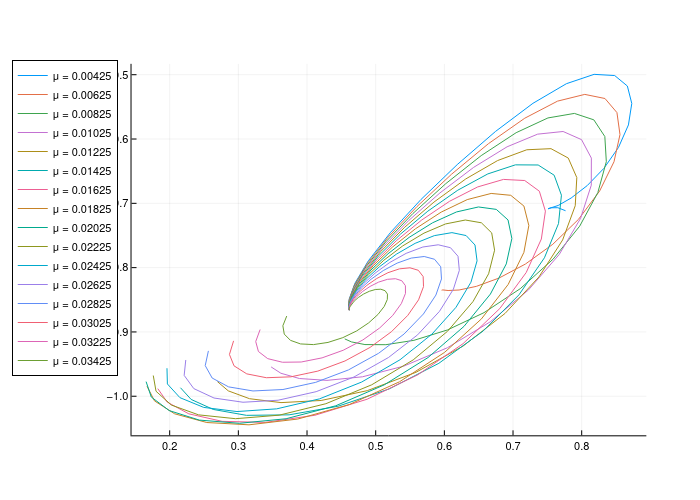

In [14]:
p = plot(legend=:outertopleft, alpha=1.0)
for j in 1:num_μ
    plot!(xjet_plot2[:, j], vjet_plot2[:, j], label="μ = $(round(μ_values[j], digits=5))")
end
display(p)

In [15]:
# d = taylorinteg(three_body_restricted_param!, initial_conditions, time_vector, order, abstol; maxsteps=9000)
# scatter!(d.x[:,1], d.x[:,2], color=:black, alpha=1.4, aspect_ratio=:equal, label="nom sol")

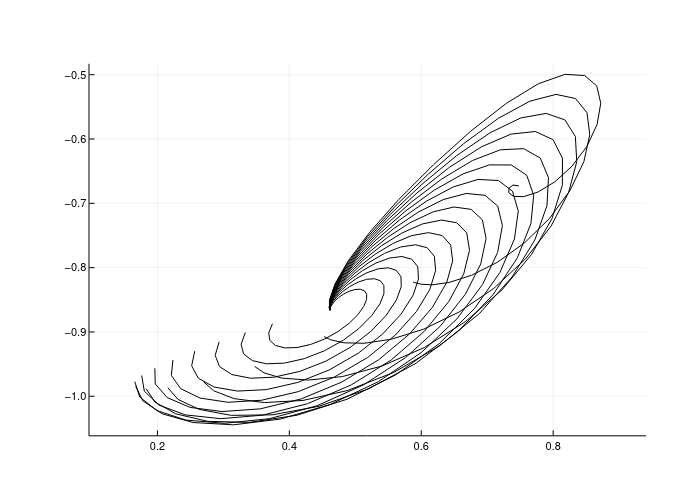

In [16]:
p = plot(color=:black, alpha=1.4, aspect_ratio=:equal, label="nom sol")

for μ in μ_values
    d1 = taylorinteg(three_body_restricted_param!, [x0, y0, vx0, vy0, μ], time_vector, order, abstol; maxsteps=9000)
    plot!(d1.x[:,1], d1.x[:,2], label="", color=:black)  
end
display(p)

In [17]:
d3 = taylorinteg(three_body_restricted_param!, initial_conditions, time_vector, order, abstol; maxsteps=9000)

tspan: (0.0, 10.0), x: 5 Float64 variables

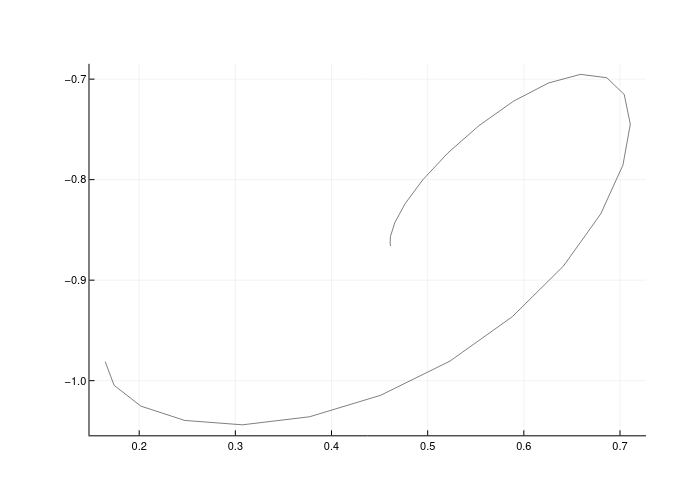

In [18]:
plot(d3.x[:,1], d3.x[:,2], label="", color=:black, alpha=0.5)  


In [16]:
function three_body_restricted_lyap!(du, u, p, t) 
    x, y, v_x, v_y = u

    x_plus_mu = x + μ
    x_minus_one_plus_mu = x - 1 + μ
    one_minus_mu = 1 - μ  

    r1 = sqrt(x_plus_mu^2 + y^2)
    r2 = sqrt(x_minus_one_plus_mu^2 + y^2)

    r1_cubed = r1^3
    r2_cubed = r2^3

    du[1] = v_x
    du[2] = v_y
    du[3] = (2v_y + x) - (one_minus_mu * x_plus_mu / r1_cubed + μ * x_minus_one_plus_mu / r2_cubed)
    du[4] = (-2v_x + y) - (one_minus_mu * y / r1_cubed + μ * y / r2_cubed)
end

three_body_restricted_lyap! (generic function with 1 method)

In [17]:
μ = 0.0385/4

0.009625

In [18]:
x0, y0, vx0, vy0  = 0.4615384615877174, -0.8660254038298406, 0.0, 0.0

(0.4615384615877174, -0.8660254038298406, 0.0, 0.0)

In [19]:
initial_conditions = [x0, y0, vx0, vy0]
t0 = 0.0     #the initial time
tmax = 80.0 #final time of integration

80.0

In [20]:
xi = set_variables("δ", order=1, numvars=4)
x0TN = initial_conditions .+ xi
dx0TN = similar(x0TN)

4-element Vector{TaylorN{Float64}}:
 #undef
 #undef
 #undef
 #undef

In [21]:
three_body_restricted_lyap!(dx0TN, x0TN, μ, t0)
jjac = TaylorSeries.jacobian(dx0TN)

4×4 transpose(::Matrix{Float64}) with eltype Float64:
  0.0        0.0       1.0  0.0
  0.0        0.0       0.0  1.0
  0.672926  -1.28926   0.0  2.0
 -1.28926    2.36977  -2.0  0.0

In [22]:
brptr = tr(jjac)

0.0

In [23]:
sol = lyap_taylorinteg(three_body_restricted_lyap!, initial_conditions, t0, tmax, 28, 1e-20, μ; maxsteps=90000)

tspan: (0.0, 80.0), x: 4 Float64 variables

In [24]:
tv, xv, λv = sol.t, sol.x, sol.λ

([0.0, 0.7630375287583059, 1.4337364090977154, 2.0294726180746854, 2.573303496931342, 3.0906861259043907, 3.606847674516766, 4.122231690315696, 4.619194104808653, 5.112046597275346  …  75.4086851986963, 75.87574084857107, 76.36183704818356, 76.84479481286712, 77.33027557554746, 77.84598575099196, 78.40764264474291, 79.0398183490848, 79.78295821162227, 80.0], [0.4615384615877174 -0.8660254038298406 0.0 0.0; 0.4611675722421976 -0.8527656179328795 0.0063233475674380184 0.03724772003949639; … ; 0.6705243547233458 -0.818658403056229 -0.09548538524845615 -0.050430258775405294; 0.6502661601187067 -0.8282817755911035 -0.09073902486295468 -0.03829826715226727], [0.0 0.0 0.0 0.0; 0.703940069662032 0.8606358615070557 -0.9631079508051231 -0.6014679803639655; … ; 0.04509295045699396 -0.024618711828274485 0.005659405922753812 -0.026133644551473295; 0.04592807631661169 -0.026382537247766052 0.005991257596439096 -0.025536796665284738])

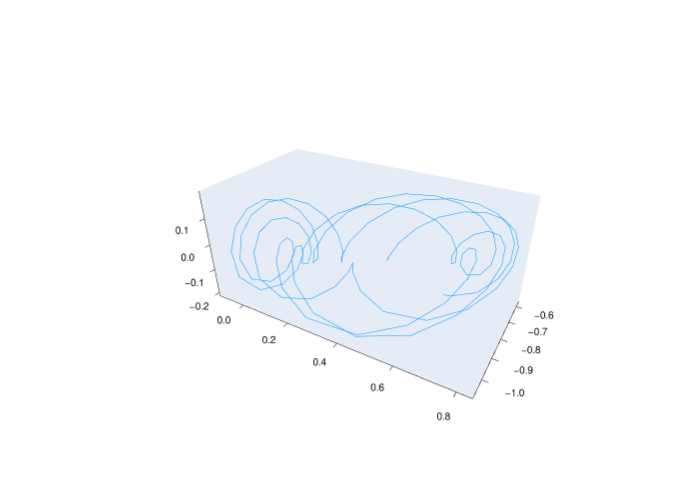

In [25]:
plot(xv[:,1], xv[:,2], xv[:,3], leg=false)

In [26]:
λv

132×4 view(transpose(view(::Matrix{Float64}, :, 1:132)), 1:132, :) with eltype Float64:
 0.0         0.0          0.0           0.0
 0.70394     0.860636    -0.963108     -0.601468
 0.881478    0.495859    -1.38269       0.00535561
 0.880373    0.29575     -0.730975     -0.445147
 0.827798    0.174037    -0.378646     -0.62319
 0.761414    0.0869422   -0.230941     -0.617415
 0.692411    0.021314    -0.170659     -0.543067
 0.626237   -0.0180676   -0.178126     -0.430044
 0.566158   -0.0248561   -0.256049     -0.285253
 0.510165   -0.00467859  -0.355811     -0.149675
 ⋮                                     
 0.0441076  -0.00337181  -0.0115519    -0.0291839
 0.0397722  -0.00325206  -0.0105283    -0.0259917
 0.0362838  -0.0034319   -0.0131122    -0.0197397
 0.0352303  -0.00457245  -0.0202686    -0.0103893
 0.0364689  -0.00668627  -0.0145456    -0.0152371
 0.0388733  -0.00991696  -0.00648744   -0.0224689
 0.0418432  -0.0154645   -0.000484148  -0.0258946
 0.045093   -0.0246187    0.00565941

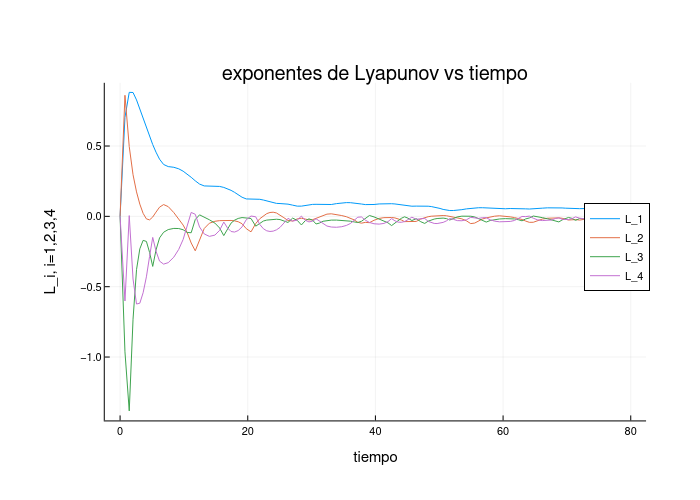

In [33]:
plot(tv, λv[:,1], label="L_1", legend=:right)
plot!(tv, λv[:,2], label="L_2")
plot!(tv, λv[:,3], label="L_3")
plot!(tv, λv[:,4], label="L_4")
xlabel!("tiempo")
ylabel!("L_i, i=1,2,3,4")
title!("exponentes de Lyapunov vs tiempo")

In [3]:
# Definir la ecuación diferencial para el oscilador armónico simple
function harmonic_oscillator!(du, u, p, t)
    x, v = u
    ω = p

    du[1] = v
    du[2] = -ω^2 * x
end

# Parámetros del oscilador
ω = 1.0  # Frecuencia angular
x0, v0 = 1.0, 0.0  # Condiciones iniciales (posición inicial, velocidad inicial)
initial_conditions = [x0, v0]
t0 = 0.0     # Tiempo inicial
tmax = 100.0  # Tiempo final de integración

100.0

In [4]:
# Pequeñas perturbaciones
xi = set_variables("δ", order=1, numvars=2)
x0TN = initial_conditions .+ xi
dx0TN = similar(x0TN)

# Evaluar el sistema con perturbaciones
harmonic_oscillator!(dx0TN, x0TN, ω, t0)

# Calcular la matriz Jacobiana
jjac = TaylorSeries.jacobian(dx0TN)

# Calcular el trazador de la matriz Jacobiana
brptr = tr(jjac)


UndefVarError: UndefVarError: `tr` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name also exists in LinearAlgebra.

In [5]:
# Integrar usando lyap_taylorinteg
sol = lyap_taylorinteg(harmonic_oscillator!, initial_conditions, t0, tmax, 28, 1e-20, ω; maxsteps=90000)

# Extraer las soluciones: tiempos, variables del sistema, y exponentes de Lyapunov
tv, xv, λv = sol.t, sol.x, sol.λ

([0.0, 1.9845682054690406, 3.975627271887717, 5.982386251632683, 7.970333977301859, 9.955400905826247, 11.950872138529377, 13.950398766166774, 15.936256884216474, 17.922758304850976  …  83.68102310539217, 85.67257945460933, 87.6783069182969, 89.66593169428198, 91.65112806317539, 93.64723054244772, 95.64598677516327, 97.63165547443363, 99.6184036607489, 100.0], [1.0 0.0; -0.40206575273729084 -0.9156107963953874; … ; 0.6117216188981672 0.7910731072237293; 0.8623188722876827 0.5063656411097615], [0.0 0.0; 0.0 0.0; … ; -1.0030282412127639e-17 -8.915806588557902e-18; -9.992007221626413e-18 -8.881784197001256e-18])

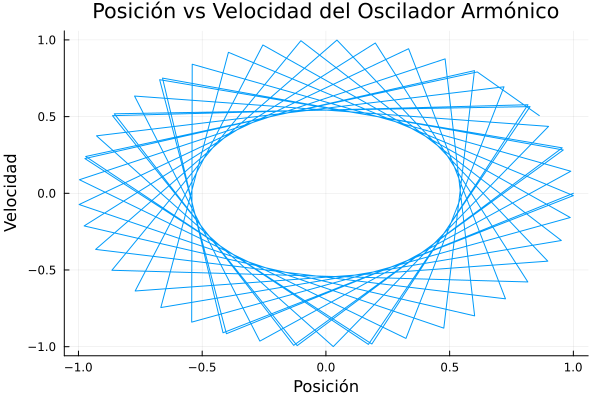

In [6]:
plot(xv[:,1], xv[:,2], leg=false, title="Posición vs Velocidad del Oscilador Armónico", xlabel="Posición", ylabel="Velocidad")

┌ Warning: No strict ticks found
└ @ PlotUtils /home/marco/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/marco/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/marco/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/marco/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/marco/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/marco/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /home/marco/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194


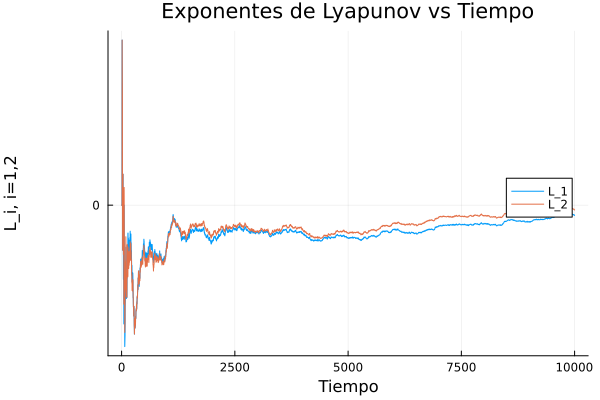

In [16]:
plot(tv, λv[:,1], label="L_1", legend=:right, xlabel="Tiempo", ylabel="L_i, i=1,2", title="Exponentes de Lyapunov vs Tiempo")
plot!(tv, λv[:,2], label="L_2")
